In [78]:
# 中間レポート　第１問 主計算
# written in python
import numpy as np
import sys
import math
import time
start_time = time.process_time()
def num_count(count): # using pointer 　passing technique 
    d=1
    ell=0.5
    rand = np.random.rand(2)
    
    if(d*rand[0]<ell*np.cos(0.5*math.pi*rand[1])):
        count[0]+=1
    #return count

### main #####
count=[0]
n=0
out=100
f = open("buffon.dat", 'w')
while n < 3e6:
    n+=1
    num_count(count)
    if(n>out):
        print("n={:e} pi={:.16f} err={:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        f.write("{:e} {:.16f} {:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        out*=1.2
f.close()
end_time = time.process_time()
elapsed_time = end_time - start_time
print(elapsed_time)

n=1.010000e+02 pi=3.6071428571428572 err=0.4655502035530641

n=1.210000e+02 pi=3.3611111111111112 err=0.2195184575213180

n=1.450000e+02 pi=3.4523809523809526 err=0.3107882987911594

n=1.730000e+02 pi=3.7608695652173911 err=0.6192769116275980

n=2.080000e+02 pi=3.7142857142857144 err=0.5726930606959213

n=2.490000e+02 pi=3.5571428571428569 err=0.4155502035530638

n=2.990000e+02 pi=3.5176470588235293 err=0.3760544052337362

n=3.590000e+02 pi=3.4190476190476189 err=0.2774549654578258

n=4.300000e+02 pi=3.4399999999999999 err=0.2984073464102068

n=5.160000e+02 pi=3.3506493506493507 err=0.2090566970595575

n=6.200000e+02 pi=3.2631578947368420 err=0.1215652411470489

n=7.440000e+02 pi=3.2920353982300883 err=0.1504427446402952

n=8.920000e+02 pi=3.2915129151291511 err=0.1499202615393580

n=1.070000e+03 pi=3.2424242424242422 err=0.1008315888344491

n=1.284000e+03 pi=3.2180451127819549 err=0.0764524591921618

n=1.541000e+03 pi=3.1257606490872210 err=0.0158320045025722

n=1.849000e+03 pi=3.0765

<ipython-input-23-b53459fd968c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot("12{}".format(j))
<ipython-input-23-b53459fd968c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot("12{}".format(j))


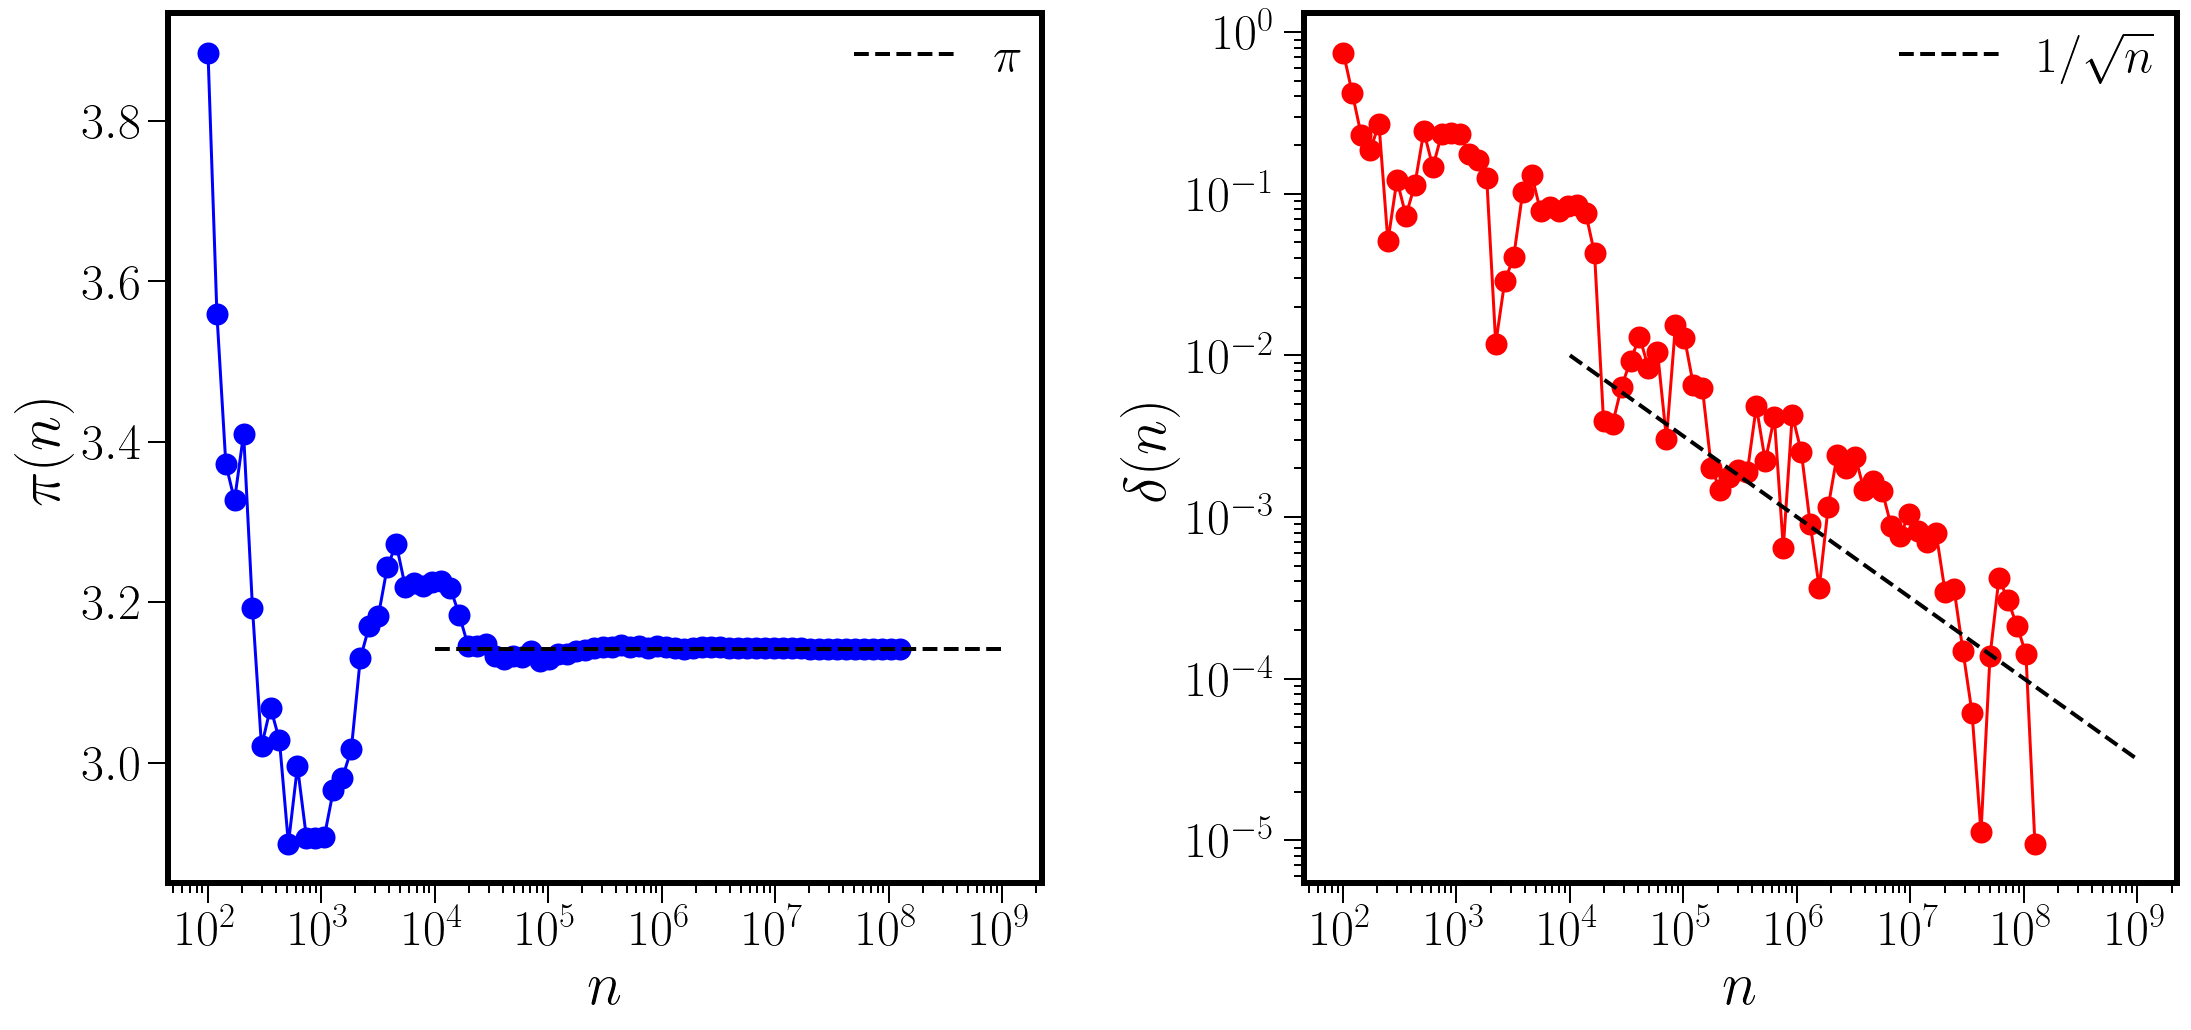

In [23]:
#第１問作図
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
plt.rcParams["text.usetex"] =True 
fig = plt.figure(figsize=(18,8))

for j in range(1,3):
    plt.subplot("12{}".format(j))
    ax1 = fig.add_subplot("12{}".format(j))
    i, pi,error  = np.loadtxt("./buffon.dat", comments='#', unpack=True)
  
    plt.xscale('log')
    ###Drawing a line ######
    x= np.linspace(1e4, 1e9, 100) 
    if(j==1):
        plt.plot(i, pi, "o-",markersize=10,color="b")
        y= np.pi+0*x
        plt.plot(x, y, "--",markersize=3,linewidth = 2.0, color="k",label=r"$\pi$")
        plt.ylabel(r"$\pi(n)$",color='k', size=30)

    else:
        plt.plot(i, error, "o-",markersize=10,color="r")
        y= 1/x**0.5
        plt.plot(x, y, "--",markersize=3,linewidth = 2.0, color="k",label=r"$1/\sqrt{n}$")  
        plt.ylabel(r"$\delta(n)$",color='k', size=30)
        plt.yscale('log')
   
    #########
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    ax1.spines['top'].set_linewidth(3)
    ax1.spines['bottom'].set_linewidth(3)
    ax1.spines['left'].set_linewidth(3)
    ax1.spines['right'].set_linewidth(3)
    plt.xlabel(r"$n$",color='k', size=30)
    plt.xticks(color='k', size=25)
    plt.yticks(color='k', size=25)
    plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=25,frameon=False)
    #################################
    #図のマージン設定
    plt.subplots_adjust(wspace=0.3, hspace=0.25)

plt.savefig('./Dropbox/buffon_pi.png')
plt.savefig('./Dropbox/buffon_pi.pdf')

In [44]:
#中間レポート　第２問 主計算
import numpy as np
import sys

zeta=[10,2,1,0.1]
dt=[0.0001,0.001,0.01,0.1]

def damp_osci(dt,zeta):
    v=0.
    x=1.
    t=0.
    i=0
    out=0.
    f = open("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt,zeta), 'w')
    while i < (int)(50./dt): 
        v -= zeta*v*dt+x*dt
        x+=v*dt
        i+=1
        if(i*dt >=out):
            print("{:.4f} {:.20f} {:.20f}".format(i*dt,v,x))
            f.write("{:.4f} {:.20f} {:.20f}\n".format(i*dt,v,x))
            out+=0.5
    f.close()
for i in range(0,4):
    for j in range(0,4):
        print("dt={:.5f}".format(dt[i]))
        damp_osci(dt[i],zeta[j]) 

dt=0.00010
0.0001 -0.00010000000000000000 0.99999998999999994975
0.5000 -0.09631243425114699441 0.96046422530568131837
1.0000 -0.09224937279534854706 0.91322471918565339966
1.5000 -0.08771039005545933076 0.86824379555223696325
2.0000 -0.08339019831549542017 0.82547795089735787055
2.5000 -0.07928276632153954950 0.78481855913609466224
3.0000 -0.07537764801668221659 0.74616186910379567188
3.5000 -0.07166487856082770502 0.70940923659756727204
4.0000 -0.06813498370233937729 0.67446687616777312169
4.5000 -0.06477895584763644632 0.64124562182092581519
5.0000 -0.06158823107733308461 0.60966069948588608174
5.5000 -0.05855466729282533117 0.57963151068720530912
6.0000 -0.05567052343926410379 0.55108142687375627489
6.5000 -0.05292843975191362238 0.52393759387780847181
7.0000 -0.05032141897548814136 0.49813074600562345928
7.5000 -0.04784280850854070316 0.47359502928508823150
8.0000 -0.04548628342733807006 0.45026783341940318506
8.5000 -0.04324583034590827324 0.42808963201799138387
9.0000 -0.0411157

10.5000 -0.00197081841904403997 -0.00397544490187797493
11.0000 0.00047879286313576975 -0.00430392612999329956
11.5000 0.00187225953423898316 -0.00367381418292551769
12.0000 0.00235664541449900553 -0.00258371943609839215
12.5000 0.00219632143749178693 -0.00142469275122913833
13.0000 0.00167586441626477634 -0.00044719530896224322
13.5000 0.00103727008785851177 0.00023184390622183051
14.0000 0.00045007697133141790 0.00059901677407005422
14.5000 0.00000720809856204429 0.00070628584742705742
15.0000 -0.00026278769291513955 0.00063524913123805184
15.5000 -0.00037590670271652263 0.00046975554236402807
16.0000 -0.00037208015484135063 0.00027886202431462302
16.5000 -0.00029806166704960437 0.00010934709830715038
17.0000 -0.00019573360127297698 -0.00001453686488859643
17.5000 -0.00009595334589067492 -0.00008687324104212667
18.0000 -0.00001694543723821351 -0.00011400641853264935
18.5000 0.00003423936835052022 -0.00010849475406864223
19.0000 0.00005868602396085356 -0.00008424555198443660
19.5000 0

dt=0.01000
0.0100 -0.01000000000000000021 0.99990000000000001101
0.5000 -0.30492559473831348793 0.90763751047978002973
1.0000 -0.36849437490993530719 0.73268582446994923174
1.5000 -0.33427087866188848198 0.55489703858713756990
2.0000 -0.26976288214972377055 0.40375617512575051604
2.5000 -0.20426986412083789069 0.28585179449970510301
3.0000 -0.14861517087123671255 0.19840844351781233845
3.5000 -0.10520854331342305299 0.13567270775492826229
4.0000 -0.07302055392974807213 0.09170247661816467721
4.5000 -0.04992961269247367384 0.06141208846409470373
5.0000 -0.03374672144029313564 0.04081959457851490336
5.5000 -0.02259915356851012122 0.02696496087850060522
6.0000 -0.01502093613534867533 0.01772117082633574772
6.5000 -0.00992247054229445334 0.01159573684469681135
7.0000 -0.00652086910416400239 0.00755962279514438805
7.5000 -0.00426683189597681835 0.00491278492194910637
8.0000 -0.00278164869932388771 0.00318398294762193244
8.5000 -0.00180769678527507686 0.00205867038967513837
9.0000 -0.0011715

dt=0.10000
0.1000 -0.10000000000000000555 0.98999999999999999112
0.5000 -0.09605960100000000834 0.95099004990000002291
1.0000 -0.09135172474836408818 0.90438207500880452017
1.5000 -0.08687458127689783038 0.86005835464128854717
2.0000 -0.08261686238355868406 0.81790693759723087641
2.5000 -0.07856781408072188722 0.77782135939914676115
3.0000 -0.07471720943315963981 0.73970037338828042994
3.5000 -0.07105532272722923925 0.70344769499956938397
4.0000 -0.06757290490602832489 0.66897175856968049690
4.5000 -0.06426116020847183474 0.63618548606387115285
5.0000 -0.06111172395328653972 0.60500606713753668497
5.5000 -0.05811664141181099169 0.57535474997692881427
6.0000 -0.05526834771623854309 0.54715664239076156061
6.5000 -0.05255964875255623309 0.52034052265030672491
7.0000 -0.04998370298991992866 0.49483865960020728680
7.5000 -0.04753400420057073139 0.47058664158565027824
8.0000 -0.04520436502664757633 0.44752321376381098972
8.5000 -0.04298890135238938454 0.42559012338865498393
9.0000 -0.0408820

<ipython-input-54-6d22cff62150>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot("41{}".format(j))
<ipython-input-54-6d22cff62150>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot("41{}".format(j))
<ipython-input-54-6d22cff62150>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a 

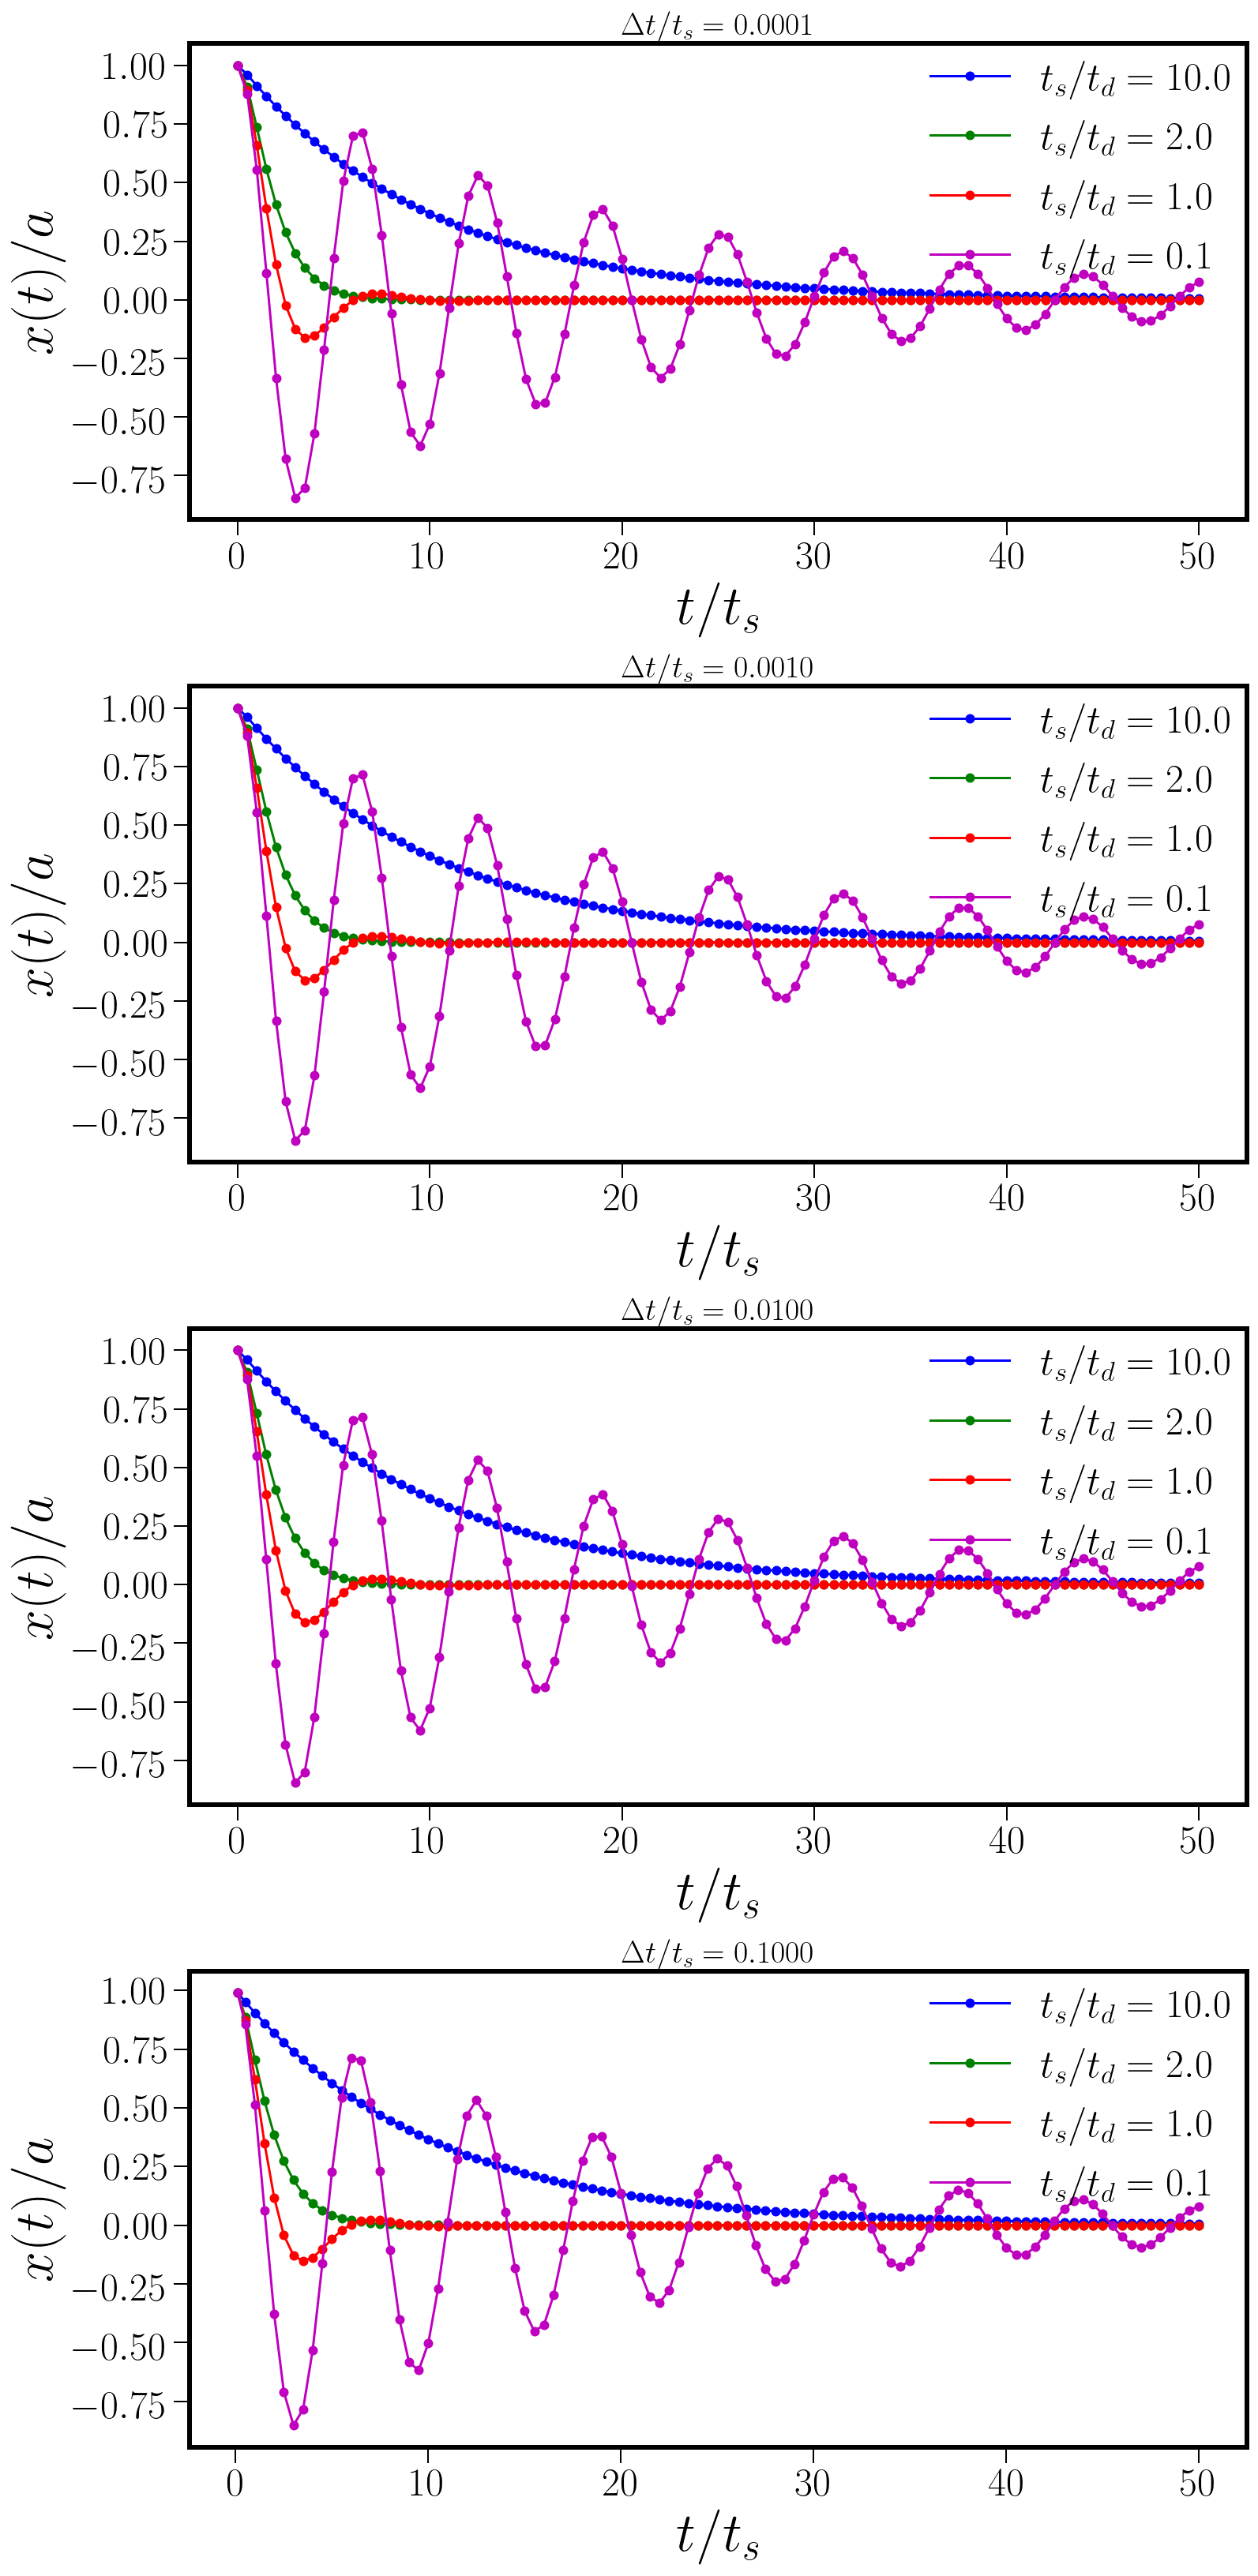

In [54]:
#中間レポート　第２問 作図
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
plt.rcParams["text.usetex"] =True 
fig = plt.figure(figsize=(12,28))

dt=[0.0001,0.001,0.01,0.1]
zeta=[10,2,1,0.1]

for j in range(1,5):
    plt.subplot("41{}".format(j))
    ax1 = fig.add_subplot("41{}".format(j))
    t, v0,x0  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[0]), comments='#', unpack=True)
    t, v1,x1  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[1]), comments='#', unpack=True)
    t, v2,x2  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[2]), comments='#', unpack=True)
    t, v3,x3  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[3]), comments='#', unpack=True)
    plt.title("$\Delta t/t_s ={:.4f}$".format(dt[j-1]),size=20)
    plt.plot(t, x0, "o-",markersize=5,color="b",label=r"$t_s/t_d={:.1f}$".format(zeta[0]))
    plt.plot(t, x1, "o-",markersize=5,color="g",label=r"$t_s/t_d={:.1f}$".format(zeta[1]))
    plt.plot(t, x2, "o-",markersize=5,color="r",label=r"$t_s/t_d={:.1f}$".format(zeta[2]))
    plt.plot(t, x3, "o-",markersize=5,color="m",label=r"$t_s/t_d={:.1f}$".format(zeta[3]))

    #########
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    ax1.spines['top'].set_linewidth(3)
    ax1.spines['bottom'].set_linewidth(3)
    ax1.spines['left'].set_linewidth(3)
    ax1.spines['right'].set_linewidth(3)
    plt.ylabel(r"$x(t)/a$",color='k', size=35)
    plt.xlabel(r"$t/t_s$",color='k', size=35)
    plt.xticks(color='k', size=25)
    plt.yticks(color='k', size=25)
    plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=25,frameon=False)
    #################################
    #図のマージン設定
    plt.subplots_adjust(wspace=0.3, hspace=0.35)

plt.savefig('./Dropbox/damp_osci.png')
plt.savefig('./Dropbox/damp_osci.pdf')

In [9]:
# 中間レポート　第１問 主計算
# written in python
import numpy as np
import sys
import math
import time

def num_count(count): # using pointer 　passing technique 
    d=1
    ell=0.5
    u1=1.5
    while u1>1:
        rand = np.random.rand(2)
        u1= rand[0]*rand[0]+rand[1]*rand[1]
        
    if(d*u1<ell*rand[1]/math.sqrt(u1)):
        count[0]+=1
    #return count

    ### main #####
count=[0]
n=0
out=100
f = open("buffon.dat", 'w')
start_time = time.process_time()
for n in range (0,(int)(3e6)):
    num_count(count)
    if(n>out):
        print("n={:e} pi={:.16f} err={:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        f.write("{:e} {:.16f} {:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        out*=1.2

f.close()
end_time = time.process_time()
elapsed_time = end_time - start_time
print(elapsed_time)

n=1.010000e+02 pi=3.1562500000000000 err=0.0146573464102069

n=1.210000e+02 pi=3.0249999999999999 err=0.1165926535897932

n=1.450000e+02 pi=3.2954545454545454 err=0.1538618918647523

n=1.730000e+02 pi=3.3269230769230771 err=0.1853304233332840

n=2.080000e+02 pi=3.1044776119402986 err=0.0371150416494945

n=2.490000e+02 pi=2.9642857142857144 err=0.1773069393040787

n=2.990000e+02 pi=3.0824742268041239 err=0.0591184267856693

n=3.590000e+02 pi=2.9669421487603307 err=0.1746505048294624

n=4.300000e+02 pi=3.0069930069930071 err=0.1345996465967860

n=5.160000e+02 pi=2.9485714285714284 err=0.1930212250183647

n=6.200000e+02 pi=2.9523809523809526 err=0.1892117012088406

n=7.440000e+02 pi=2.9760000000000000 err=0.1655926535897931

n=8.920000e+02 pi=3.0033670033670035 err=0.1382256502227897

n=1.070000e+03 pi=3.0140845070422535 err=0.1275081465475396

n=1.284000e+03 pi=3.0791366906474820 err=0.0624559629423111

n=1.541000e+03 pi=3.1384928716904277 err=0.0030997818993654

n=1.849000e+03 pi=3.1075